<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook setup and packages installation

In [110]:
import pandas as pd
import numpy as np
import pylab as pl
import os
from scipy import interpolate
pl.style.use('seaborn')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018/

/content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018


In [99]:
lcvs = pd.read_csv('training_set.csv')

In [5]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


# Extract features

## Creating a common time frame

In [100]:
lcvs['time_from_start'] = lcvs.groupby(['object_id', 'passband'])[['mjd']].apply(lambda x: x - x.min())

In [142]:
lcvs['time_from_start'].median()

430.8918000000049

In [102]:
lcvs

,object_id,mjd,passband,flux,flux_err,detected,time_from_start
0,615,59750.4229,2,-544.810303,3.622952,1,0.0000
1,615,59750.4306,1,-816.434326,5.553370,1,0.0000
2,615,59750.4383,3,-471.385529,3.801213,1,0.0000
3,615,59750.4450,4,-388.984985,11.395031,1,0.0000
4,615,59752.4070,2,-681.858887,4.041204,1,1.9841
...,...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-39.881969,46.477093,0,833.6750
1421701,130779836,60560.0459,1,14.894439,18.947685,0,806.8968
1421702,130779836,60571.0225,5,30.593130,50.695290,0,855.6906
1421703,130779836,60585.9974,4,-23.471439,44.819859,0,863.6886


## Organize timeseries by ID and passband 
Method for turning groupbys to lists found [here](https://stackoverflow.com/questions/50961341/convert-groupby-values-into-list-of-arrays), there is probably a simpler way to do this than what I'm doing but I could not figure out how to turn a groupby into multiple dataframes? 

In [69]:
lcvs_group = lcvs.groupby(['object_id','passband'])

In [74]:
lcvs_tolist = lcvs_group.apply(pd.Series.tolist).tolist()

In [157]:
lcvs_tolist[1]

[[615.0, 59750.4306, 1.0, -816.434326, 5.55337, 1.0, 0.0],
 [615.0, 59752.4147, 1.0, -1061.457031, 6.472994, 1.0, 1.9841000000014901],
 [615.0, 59767.3045, 1.0, -815.188599, 5.293019, 1.0, 16.873899999998685],
 [615.0, 59770.2256, 1.0, -820.042786, 5.875329, 1.0, 19.794999999998254],
 [615.0, 59779.3265, 1.0, -921.002502, 6.3068, 1.0, 28.895900000003166],
 [615.0, 59782.1974, 1.0, -449.095612, 4.02831, 1.0, 31.766799999997602],
 [615.0, 59797.2938, 1.0, 35.511822, 3.163646, 1.0, 46.86319999999978],
 [615.0, 59800.3244, 1.0, 129.541901, 4.358776, 1.0, 49.89379999999801],
 [615.0, 59807.1815, 1.0, -420.796417, 4.037735, 1.0, 56.75089999999909],
 [615.0, 59810.1122, 1.0, -527.020325, 4.204173, 1.0, 59.68160000000353],
 [615.0, 59813.1122, 1.0, -1100.440063, 6.709106, 1.0, 62.68160000000353],
 [615.0, 59835.0678, 1.0, -178.149399, 3.809858, 1.0, 84.63719999999739],
 [615.0, 59839.0384, 1.0, -953.883728, 6.03541, 1.0, 88.60779999999795],
 [615.0, 59842.0285, 1.0, -1003.971497, 6.256784, 1.0

# Test interpolation

In [158]:
# making sure this works
df = pd.DataFrame(lcvs_tolist[0], columns=lcvs.columns)

In [164]:
intervals = np.linspace(0, df['time_from_start'].max(), num=100)
interpolation = interpolate.interp1d(x = df['time_from_start'], y = df['flux'])
evenint = interpolation(intervals)

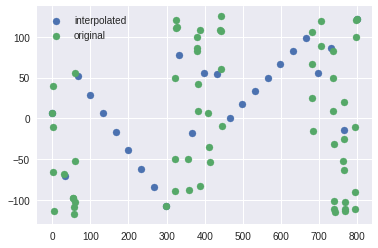

In [163]:
fig, ax = plt.subplots()
ax.scatter(intervals, evenint, label="interpolated")
ax.scatter(df['time_from_start'], df['flux'], label="original")
ax.legend()

Fig. 1: scatter plot of object 615, passband 1 and its interpolation. Honestly, it's not amazing but I feel like I understand what's going on here more than I did with Gaussian processes and at least I know how that's going to affect my outputs for this homework?

In [173]:
garbage_in = [df.iloc[0]['object_id'], df.iloc[0]['passband'], intervals, evenint]

# Interpolating

I'm just using the scipy interpolate method because I don't feel like I really understand what I was doing with Gaussian Proccesses on our last assignment to use them in any meaningful and/or sophisticated way. 

In [176]:
reshaped_lcvs = []

for index in range(0, len(lcvs_tolist)):
  df = pd.DataFrame(lcvs_tolist[index], columns=lcvs.columns)
  intervals = np.linspace(0, df['time_from_start'].max(), num=100) # even if timescales are different, all samples are equal length
  interpolation = interpolate.interp1d(x = df['time_from_start'], y = df['flux'])
  evenint = interpolation(intervals)
  garbage_in = [df.iloc[0]['object_id'], df.iloc[0]['passband'], intervals, evenint] # I am making a joke
  reshaped_lcvs.append(garbage_in)

In [188]:
final_interpolated_flux = []
for ids in lcvs['object_id'].unique():
  bands = []
  for index in range(0, len(reshaped_lcvs)):
    if reshaped_lcvs[index][0] == ids:
      bands.append(reshaped_lcvs[index][3])
  final_interpolated_flux.append(bands)


In [191]:
np.save('garbage.npy', final_interpolated_flux)